<h1 align="center">Pistachio types Prediction</h1>
<br>

**Introduction**

Did you know there are numerous varieties of pistachios? Considering that each species has unique properties, recognizing and isolating pistachios is a highly practical technique. Some pistachios, for example, are better suited for baking, and others, which are more crunchy, are generally consumed as snacks.
In this notebook, we attempt to predict what kind of pistachio using the attributes extracted from the processed images.

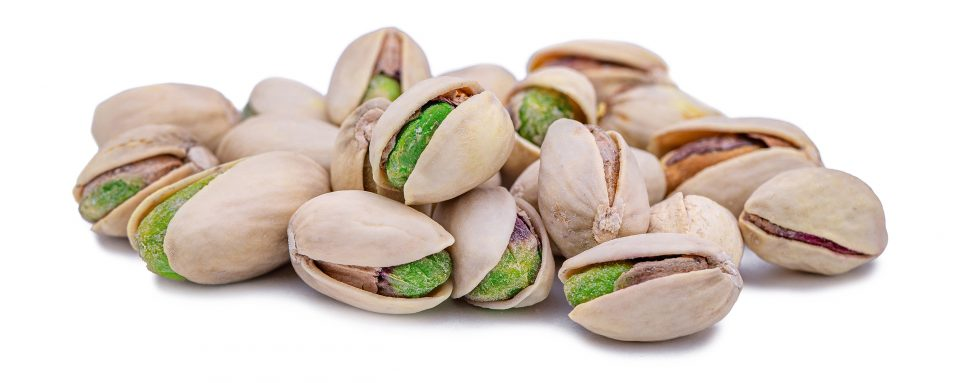

#### Tasks in this notebook:

- Dataset overview
- Import libraries
- Read dataset and get information from data
- Cleaning Data
- Data visualization
- Features


#### Modeling:

- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest
- ADABoost
- XGBoost
- Logistic Regression
- Naive Bayes
- Support Vector Machines (SVM)
- Gradient Boosting
- Gradient Boosting Decision Trees (GBDT)

#### Import the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score, accuracy_score, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
#from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#### Ignore warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

##### Read dataset and get information from data

In [3]:
data=pd.read_csv(r"Datasets/pistachio.csv")

##### Get the first ten rows of the data

In [4]:
data.head(10)

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  73107  1161.8070    442.4074    217.7261        0.8705  305.0946    0.9424   
1  89272  1173.1810    460.2551    251.9546        0.8369  337.1419    0.9641   
2  60955   999.7890    386.9247    209.1255        0.8414  278.5863    0.9465   
3  79537  1439.5129    466.7973    221.2136        0.8806  318.2289    0.9437   
4  96395  1352.6740    515.8730    246.5945        0.8784  350.3340    0.9549   
5  74065  1380.5500    405.4317    245.2286        0.7963  307.0871    0.9041   
6  91533  1915.9561    451.7373    267.9266        0.8051  341.3846    0.9395   
7  77803  2034.9950    455.4354    270.3713        0.8047  314.7409    0.7967   
8  90992  1185.5310    468.9019    249.6060        0.8465  340.3742    0.9883   
9  83311  1208.8810    473.0142    228.6437        0.8754  325.6913    0.9687   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        77579  0.7710        2.0319     0.6806       0.6896         0.0061   
1        92598  0.7584        1.8267     0.8151       0.7325         0.0052   
2        64400  0.7263        1.8502     0.7663       0.7200         0.0063   
3        84281  0.7568        2.1102     0.4823       0.6817         0.0059   
4       100950  0.7428        2.0920     0.6620       0.6791         0.0054   
5        81920  0.7251        1.6533     0.4883       0.7574         0.0055   
6        97432  0.7333        1.6860     0.3133       0.7557         0.0049   
7        97652  0.6716        1.6845     0.2361       0.6911         0.0059   
8        92072  0.7601        1.8786     0.8136       0.7259         0.0052   
9        86004  0.7708        2.0688     0.7164       0.6885         0.0057   

   SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4              Class  
0         0.0030         0.4756         0.9664  Kirmizi_Pistachio  
1         0.0028         0.5366         0.9802     Siit_Pistachio  
2         0.0034         0.5184         0.9591  Kirmizi_Pistachio  
3         0.0028         0.4648         0.9807  Kirmizi_Pistachio  
4         0.0026         0.4612         0.9648  Kirmizi_Pistachio  
5         0.0033         0.5737         0.9485  Kirmizi_Pistachio  
6         0.0029         0.5711         0.9629     Siit_Pistachio  
7         0.0035         0.4776         0.8045  Kirmizi_Pistachio  
8         0.0027         0.5269         0.9899     Siit_Pistachio  
9         0.0027         0.4741         0.9808  Kirmizi_Pistachio

##### Check the number of rows and columns

In [5]:
row, col = data.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 1718 rows and 17 columns.


##### Get the information of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

##### Describe the whole data set

In [7]:
data.describe()

AREA    PERIMETER   MAJOR_AXIS   MINOR_AXIS  ECCENTRICITY  \
count    1718.000000  1718.000000  1718.000000  1718.000000   1718.000000   
mean    79871.952852  1421.797588   446.206444   238.193128      0.840347   
std     12968.217051   373.408835    31.885328    30.426445      0.049026   
min     29808.000000   858.363000   321.425500   133.509600      0.504900   
25%     71898.500000  1169.633225   426.554100   217.875475      0.817500   
50%     79795.000000  1260.785500   448.453150   235.888750      0.850250   
75%     88980.000000  1599.479000   467.515200   257.433625      0.875375   
max    124008.000000  2755.049100   535.642200   383.046100      0.946000   

           EQDIASQ     SOLIDITY    CONVEX_AREA       EXTENT  ASPECT_RATIO  \
count  1718.000000  1718.000000    1718.000000  1718.000000   1718.000000   
mean    317.790000     0.940103   84947.671129     0.716055      1.899342   
std      26.571699     0.050006   13081.742551     0.052534      0.241253   
min     194.814600     0.588000   37935.000000     0.427200      1.158500   
25%     302.562375     0.920250   76357.750000     0.688100      1.736325   
50%     318.744650     0.953800   84973.000000     0.726100      1.899550   
75%     336.590000     0.976300   93660.750000     0.753600      2.068575   
max     397.356100     0.995100  132478.000000     0.820400      3.085800   

         ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  \
count  1718.000000  1718.000000    1718.000000    1718.000000    1718.000000   
mean      0.570831     0.712841       0.005704       0.003017       0.510097   
std       0.211514     0.044230       0.000810       0.000334       0.063391   
min       0.062800     0.476000       0.004000       0.002400       0.226600   
25%       0.372325     0.682000       0.005200       0.002800       0.465125   
50%       0.643850     0.709750       0.005600       0.003000       0.503750   
75%       0.744450     0.741600       0.006100       0.003200       0.549975   
max       0.933600     0.869500       0.013100       0.005300       0.756100   

       SHAPEFACTOR_4  
count    1718.000000  
mean        0.955185  
std         0.051735  
min         0.620400  
25%         0.944200  
50%         0.972800  
75%         0.986800  
max         0.999000

##### Describe only object columns

In [8]:
data.describe(include="object")

Class
count                1718
unique                  2
top     Kirmizi_Pistachio
freq                  998

## Data Cleaning

Data cleaning, also known as data cleansing or data scrubbing, is a crucial process in data management and analysis. It involves identifying and correcting errors, inconsistencies, and inaccuracies in datasets to improve their quality and reliability. The goal of data cleaning is to ensure that the data is accurate, complete, and ready for further analysis or modeling.

Here are some common steps involved in data cleaning:

`Data Inspection:` The first step is to inspect the data to identify potential issues such as missing values, outliers, duplicates, and formatting errors.

`Handling Missing Values:` Missing values are gaps in the data where information is not recorded or available. Depending on the situation, you can either delete the rows or columns with missing values, impute them with the mean, median, or a predicted value, or use advanced techniques like interpolation or multiple imputation.

`Removing Duplicates:` Duplicates can distort analysis results. Identifying and removing them helps maintain data integrity. Duplicates can occur in entire rows or within specific columns.

`Data Transformation:` Data may need to be transformed to make it consistent. This can include standardizing text case, converting dates into a common format, or normalizing numerical values to a common scale.

`Handling Outliers:` Outliers are data points that deviate significantly from the rest of the data. Deciding whether to remove or adjust outliers depends on the specific analysis goals and the nature of the data.

`Dealing with Inconsistencies:` Inconsistent data can arise due to data entry errors or merging data from different sources. Ensuring consistency throughout the dataset is important for accurate analysis.

`Validating and Formatting Data:` Ensuring that data adheres to the defined data types, constraints, and formats. For example, checking that dates are in the correct date format, numerical fields contain only numbers, and categorical variables have appropriate labels.

`Handling Noise:` Noise refers to random variations or errors in the data. Techniques like smoothing or filtering can help reduce noise and improve data quality.

`Addressing Data Integrity Issues:` Data integrity issues occur when the relationships between different datasets are not maintained. For instance, when the data refers to a non-existent entity or incorrectly associates two pieces of information.

Data Integration and Transformation: When combining data from multiple sources, integrating and transforming the data to a common format is essential.

`Documentation:` Keeping track of all the changes made during the data cleaning process is vital. Documenting the steps taken allows for reproducibility and transparency.

Data cleaning is an iterative process, and it's essential to carefully validate the results at each step to ensure that the cleaning process does not introduce new errors or biases. By conducting effective data cleaning, analysts and data scientists can produce accurate and reliable insights from their datasets.

##### Check the missing observations

In [9]:
data.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

###### Checking duplicated values

In [10]:
print("Number of duplicate data : ",data.duplicated().sum())

Number of duplicate data :  0


### Data visualization

Data visualization is the graphical representation of data and information using visual elements like charts, graphs, and maps. It is a powerful way to present complex datasets in a visually appealing and easy-to-understand manner. Data visualization helps users grasp patterns, trends, and insights that might be challenging to interpret from raw data alone.

Here are some key benefits and aspects of data visualization:

`1. Communication:` Visual representations of data make it easier to communicate complex ideas and findings to both technical and non-technical audiences. Well-designed visualizations can convey information quickly and effectively.

`2. Insights and Patterns:` Data visualizations allow users to identify patterns, trends, correlations, and outliers in the data that might not be apparent in tables or raw numbers.

`3. Decision Making:` Visualizations aid in decision-making processes by presenting information in a format that is easily digestible and can support data-driven decision making.

`4. Exploration:` Interactive visualizations enable users to explore the data interactively, drilling down to specific details and adjusting parameters to gain deeper insights.

`5. Storytelling:` Data visualization can be used to tell compelling data-driven stories by combining multiple visualizations to convey a narrative.

`6. Identifying Anomalies:` Visualizations can highlight data anomalies and errors, making it easier to spot data quality issues.

`7. Comparison:` Visualizations facilitate comparing data across different categories or time periods, enabling better analysis.

`8. Types of Data Visualizations:` There are various types of data visualizations, including bar charts, line charts, scatter plots, pie charts, heatmaps, histograms, area charts, tree maps, bubble charts, and more. The choice of visualization depends on the type of data and the insights you want to communicate.

`9. Tools for Data Visualization:` There are numerous data visualization tools available, ranging from simple spreadsheet software with basic charting capabilities to specialized data visualization software and programming libraries. Some popular tools include Tableau, Power BI, ggplot2 (in R), matplotlib (in Python), D3.js, and many others.

`10. Design Principles:` Effective data visualization follows certain design principles, such as using appropriate chart types, avoiding clutter, ensuring proper labeling, providing context, using color and scale effectively, and ensuring accessibility for all users.

`11. Interactive Visualizations:` Interactivity in data visualizations allows users to interact with the charts and graphs, providing more control and enabling deeper exploration of the data.

Data visualization plays a crucial role in data analysis and storytelling, helping people understand and make use of the vast amount of data available in today's world. However, it's important to create visualizations carefully, ensuring they are accurate, informative, and avoid misinterpretation of the data.

##### Checking Outliers:

Outliers are data points that deviate significantly from the rest of the data in a dataset. They are observations that are unusually far away from the majority of the data points and can be either higher or lower than most other values. Outliers can occur due to various reasons, such as data entry errors, measurement errors, natural variability, or they may even represent valid but extreme observations.

Outliers can have a considerable impact on data analysis and statistical modeling, and dealing with them appropriately is crucial. 

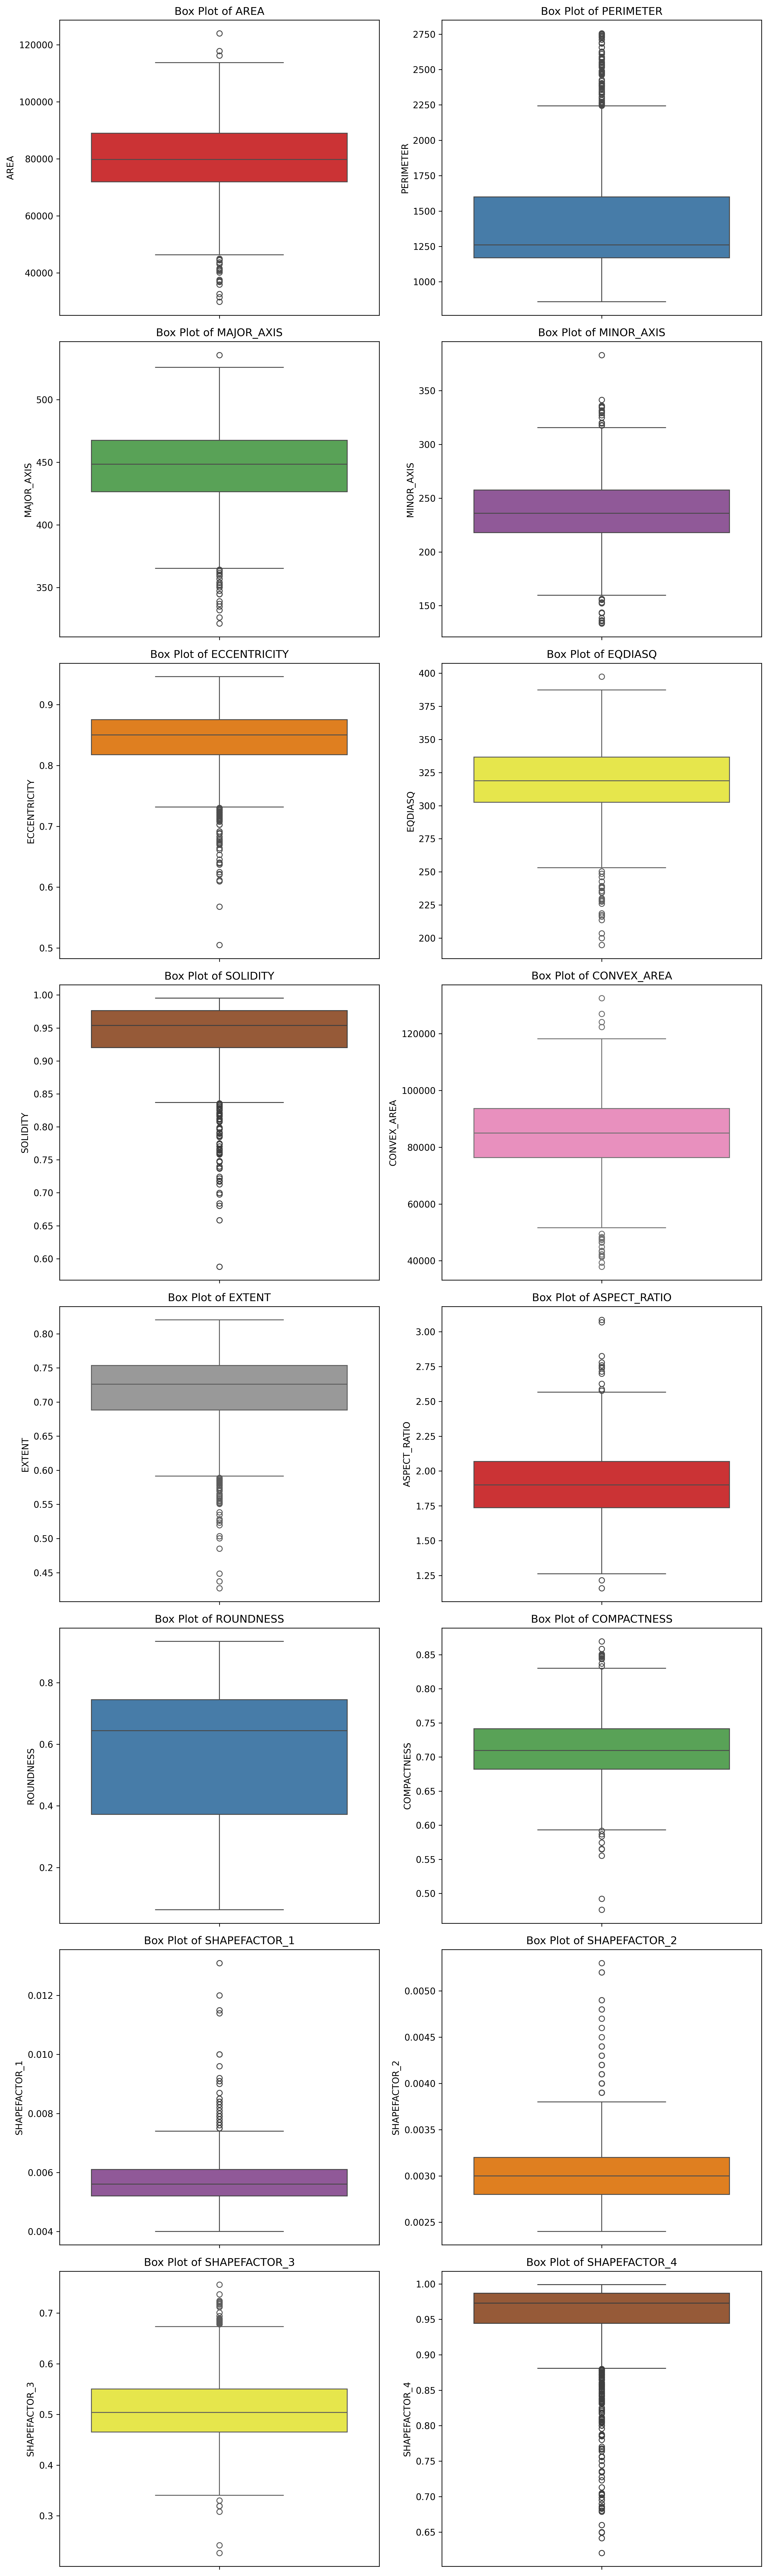

In [12]:
column_to_exclude = 'Class'

all_columns = data.columns

columns = all_columns.drop(column_to_exclude).values

num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 40),dpi = 300)

colors = sns.color_palette("Set1", num_columns)
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(data=data[column], ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(f'Box Plot of {column}')

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

#### Distibution

In statistics and data analysis, a distribution refers to the way in which a set of data values are spread or distributed across different possible outcomes. It describes the patterns and characteristics of the data and is fundamental for understanding the behavior of a dataset. Various statistical measures and graphical representations are used to study and visualize different types of distributions.

**Types of Distributions:**

`Normal Distribution (Gaussian Distribution):` The normal distribution is a symmetric bell-shaped curve. In a normal distribution, the mean, median, and mode are all equal, and the data is evenly spread around the mean. Many natural phenomena follow approximately a normal distribution, and it plays a significant role in statistical modeling.

`Uniform Distribution:` In a uniform distribution, all data points have an equal probability of occurrence. It is characterized by a constant probability density function across the range of possible values.

`Skewed Distribution:` A skewed distribution is asymmetric, and the tail of the distribution is pulled towards one side. It can be either positively skewed (tail on the right) or negatively skewed (tail on the left).

`Exponential Distribution:` The exponential distribution is often used to model the time between events in a process that occurs randomly at a constant rate. It is positively skewed and has a decreasing probability density function.

`Binomial Distribution:` The binomial distribution describes the number of successes in a fixed number of independent Bernoulli trials with a constant probability of success.

`Poisson Distribution:` The Poisson distribution models the number of events that occur in a fixed interval of time or space, given a constant average rate of occurrence.

`Log-Normal Distribution:` The log-normal distribution is derived from the logarithm of a normal distribution. It is often used to model data that is positively skewed on a logarithmic scale.

**Measures to Describe Distributions:**

Several statistical measures are used to describe the central tendency, spread, and shape of a distribution:

`Mean:` The arithmetic average of all the data points in a distribution.

`Median:` The middle value in a dataset when the data is sorted in ascending or descending order. It represents the 50th percentile.

`Mode:` The value that appears most frequently in the dataset.

`Standard Deviation:` A measure of how much the data deviates from the mean. A higher standard deviation indicates greater variability.

`Skewness:` A measure of the asymmetry of a distribution. Positive skewness indicates a longer tail on the right, while negative skewness indicates a longer tail on the left.

`Kurtosis:` A measure of the peakedness or flatness of a distribution's shape. High kurtosis indicates a sharper peak, while low kurtosis indicates a flatter peak.

**Visualization of Distributions:**

Graphical representations, such as histograms, box plots, density plots, and cumulative distribution functions (CDF), are commonly used to visualize and interpret distributions. These visualizations provide insights into the shape, spread, and outliers of the data, helping to better understand the underlying patterns and characteristics of the dataset.


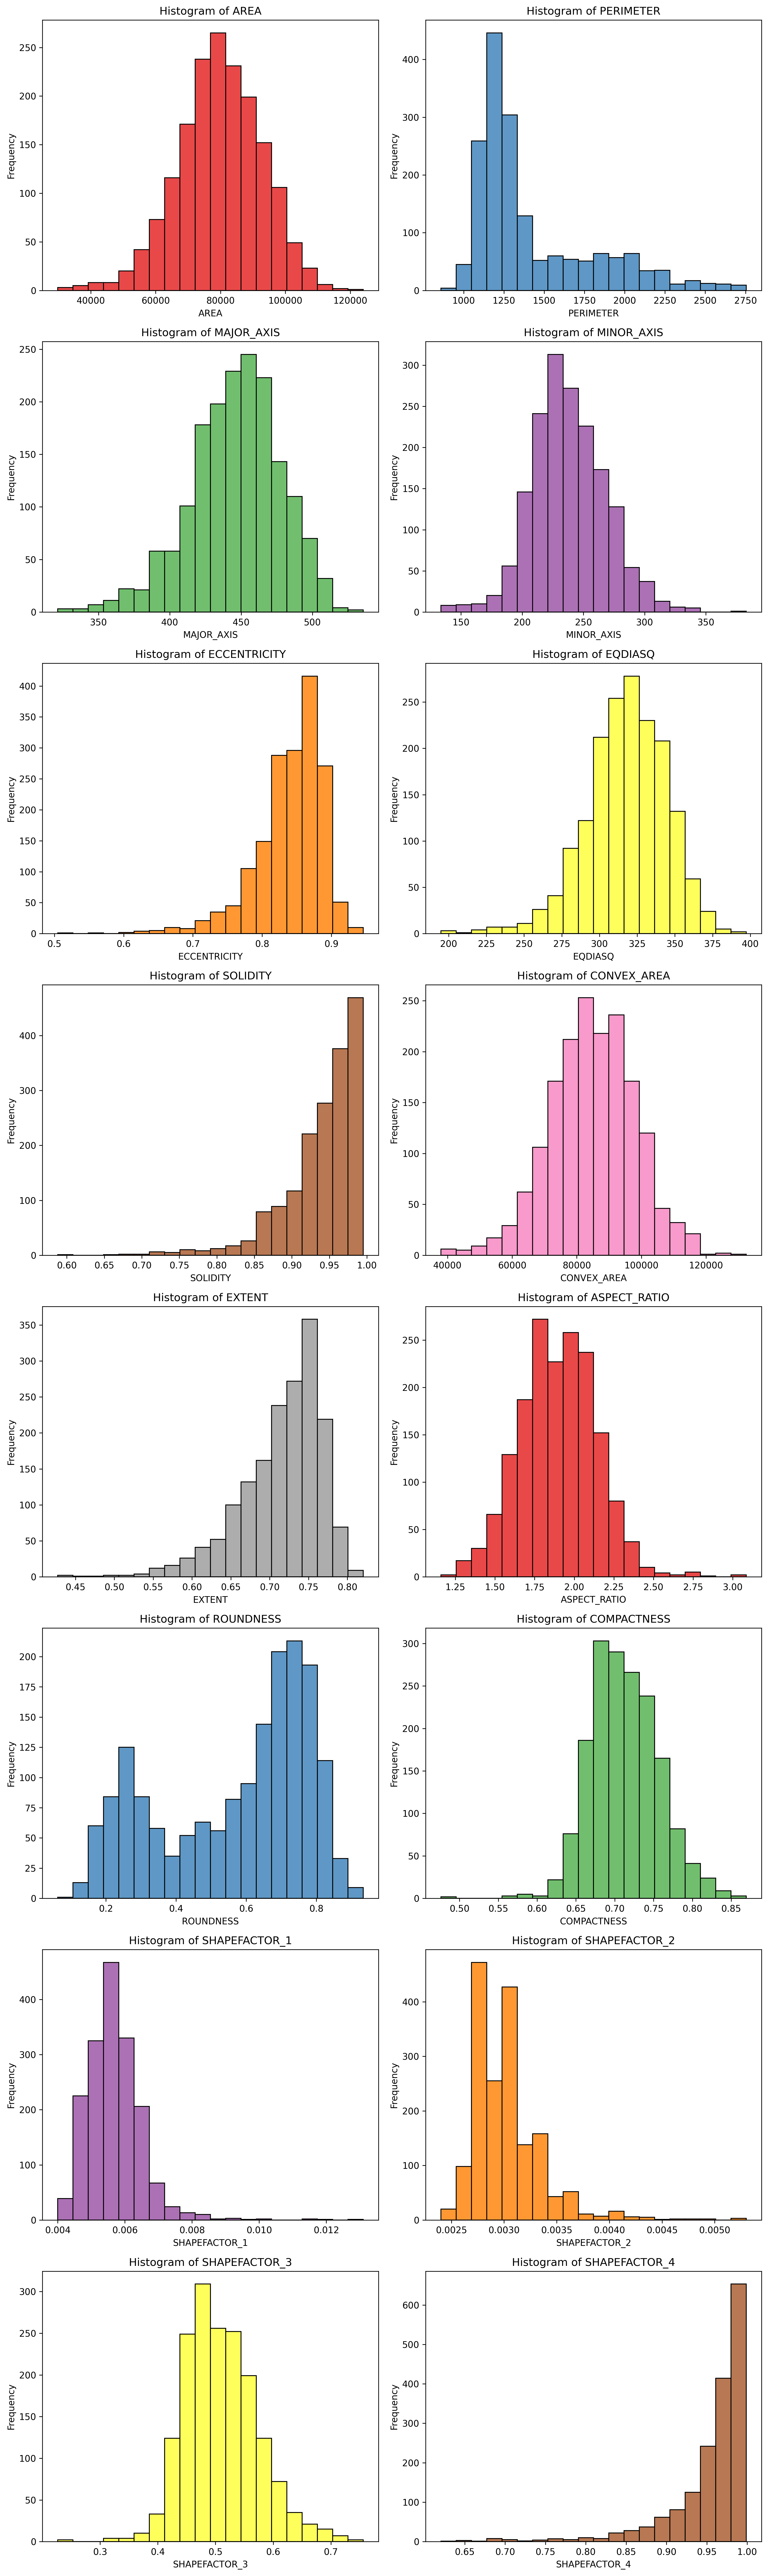

In [14]:
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 40), dpi=300)

colors = sns.color_palette("Set1", num_columns)
label_color = 'black'
title_color = 'black'
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    
    sns.histplot(data=data[column], ax=axes[row, col], color=colors[i], alpha=0.8, bins=20)
    axes[row, col].set_ylabel('Frequency', color=label_color)
    axes[row, col].yaxis.label.set_color(label_color)
    axes[row, col].set_title(f'Histogram of {column}', color=title_color)
    
    axes[row, col].tick_params(axis='x', colors=label_color)
    axes[row, col].tick_params(axis='y', colors=label_color)
    axes[row, col].title.set_color(title_color)
    fig.subplots_adjust(wspace=0.4)
    
if num_columns % 2 != 0:
    axes[-1, -1].axis('off')
    
plt.tight_layout()
plt.show()

#### Kernal Density Estimator:

A kernel density estimator (KDE) is a non-parametric method used to estimate the probability density function (PDF) of a continuous random variable based on a set of observed data points. It is a smoothing technique that allows us to represent the underlying distribution of the data without assuming any specific parametric distribution (e.g., normal, exponential).

Kernel density estimation is widely used in various fields, such as statistics, data analysis, data visualization, and machine learning. It is particularly useful when the underlying distribution of the data is unknown or when parametric assumptions about the data are not appropriate. KDE is often used for exploratory data analysis, visualization of data distributions, and as a basis for further statistical analyses.

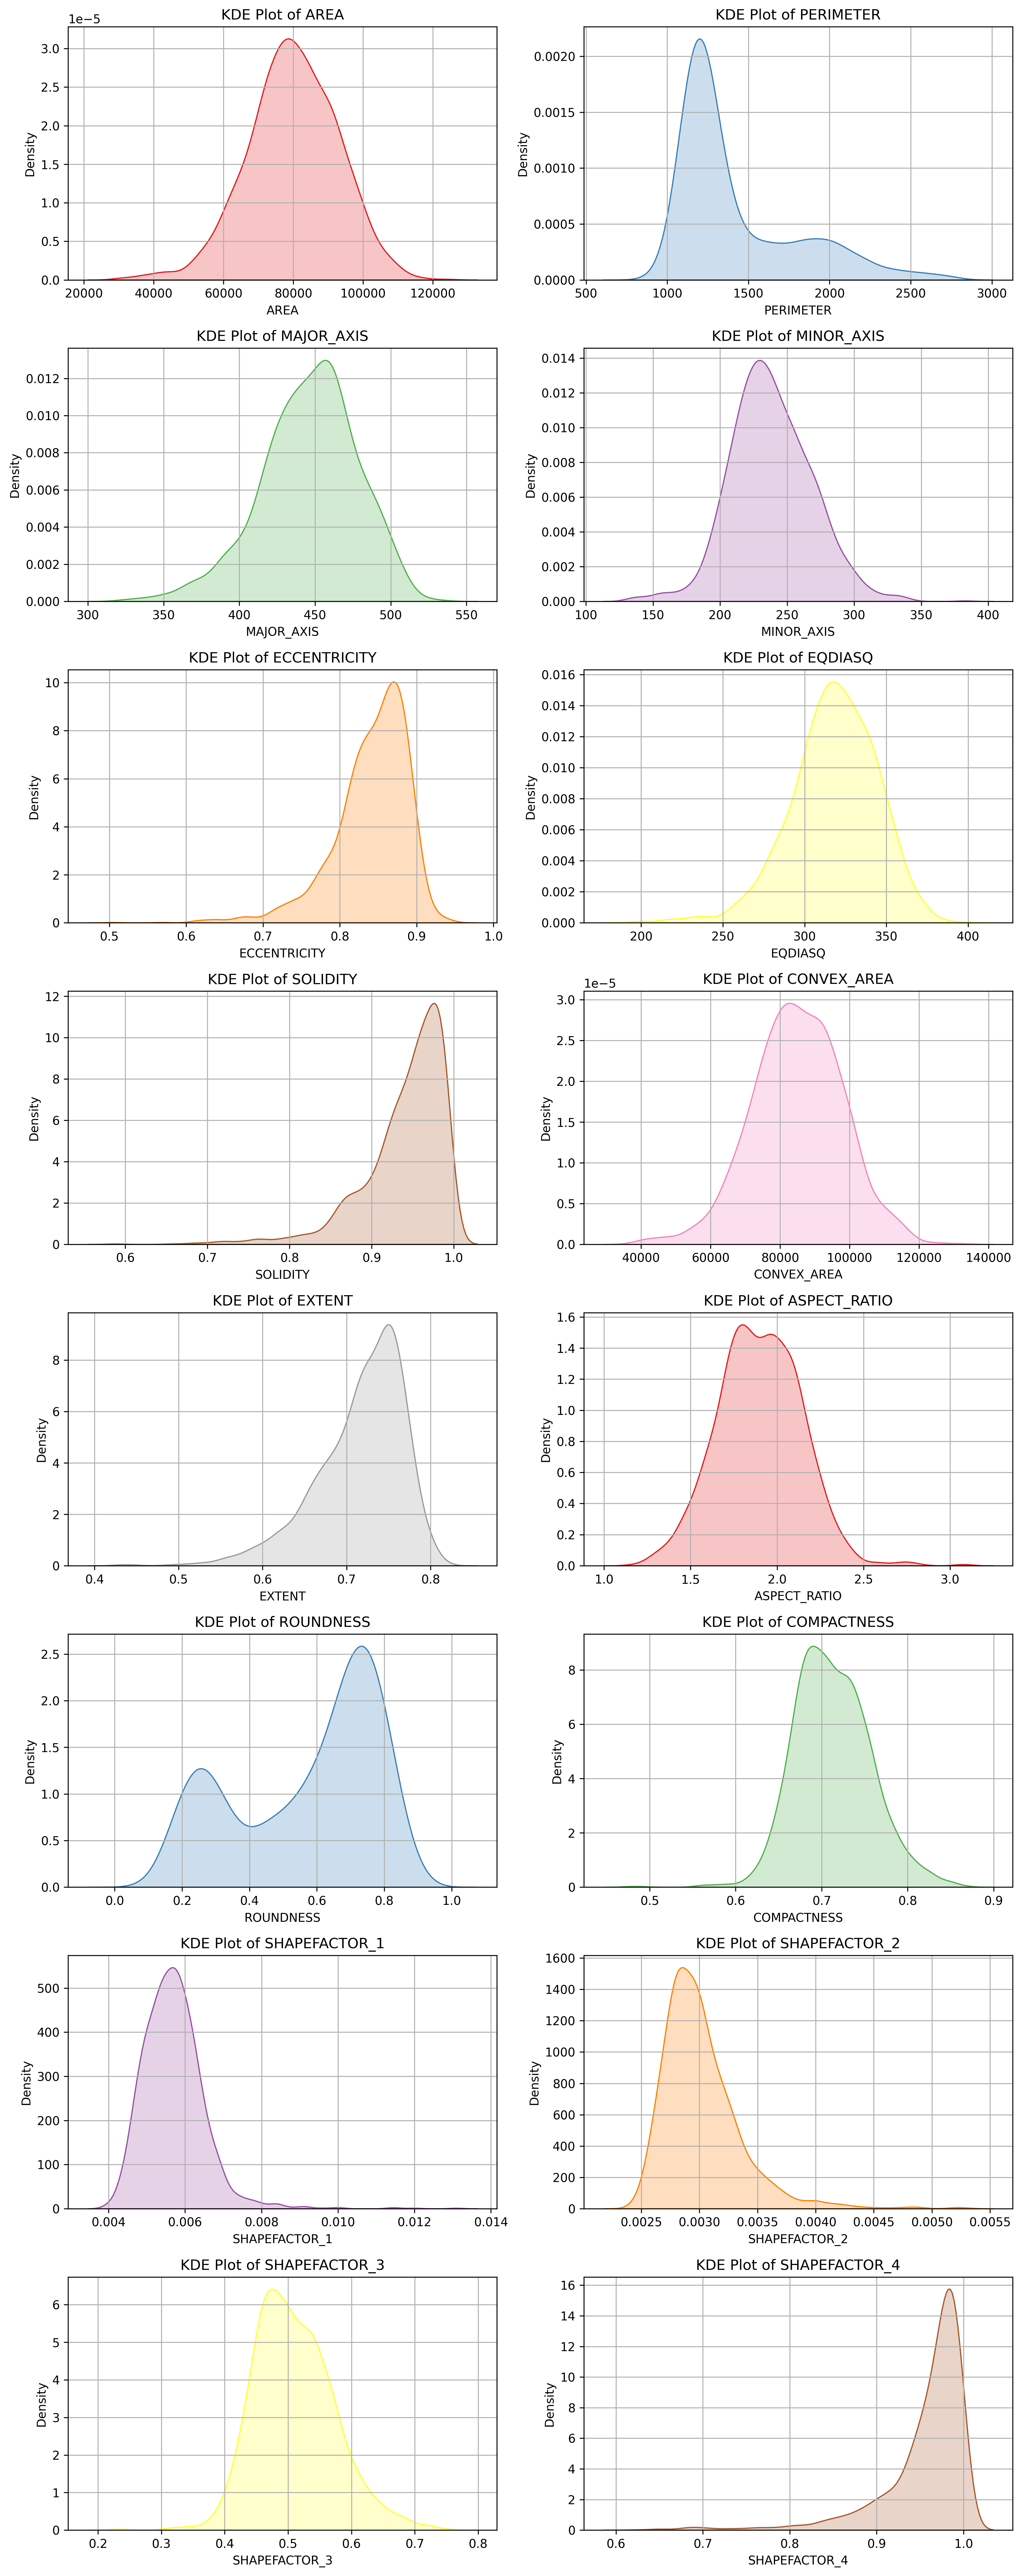

In [15]:
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 30), dpi=300)

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    
    sns.kdeplot(data=data[column], ax=axes[row, col], color=colors[i], fill=True, legend=False)
    axes[row, col].set_ylabel('Density', color=label_color)
    axes[row, col].yaxis.label.set_color(label_color)
    axes[row, col].set_title(f'KDE Plot of {column}', color=title_color)
    
    axes[row, col].tick_params(axis='x', colors=label_color)
    axes[row, col].tick_params(axis='y', colors=label_color)
    axes[row, col].title.set_color(title_color)
    axes[row, col].grid(True)
    
    fig.subplots_adjust(wspace=0.4)

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

#### Density Heatmap:

A density heatmap, also known as a kernel density heatmap, is a two-dimensional representation of data density using colors to visualize the distribution of data points across a continuous space. It is created by applying the kernel density estimation (KDE) technique to a set of data points in two dimensions. Density heatmaps are commonly used to explore the spatial distribution of data or to visualize the intensity of events or phenomena over a geographic area.

Density heatmaps are particularly useful when dealing with large datasets that contain many data points. They can effectively reveal patterns and trends that might not be evident when looking at individual data points or traditional scatter plots. Density heatmaps are commonly used in fields like data exploration, data visualization, geospatial analysis, environmental monitoring, and various scientific and research applications. They provide valuable insights into the spatial distribution and concentration of data, making them an essential tool for data analysts and researchers.

TypeError: The y variable is categorical, but one of ['numeric', 'datetime'] is required

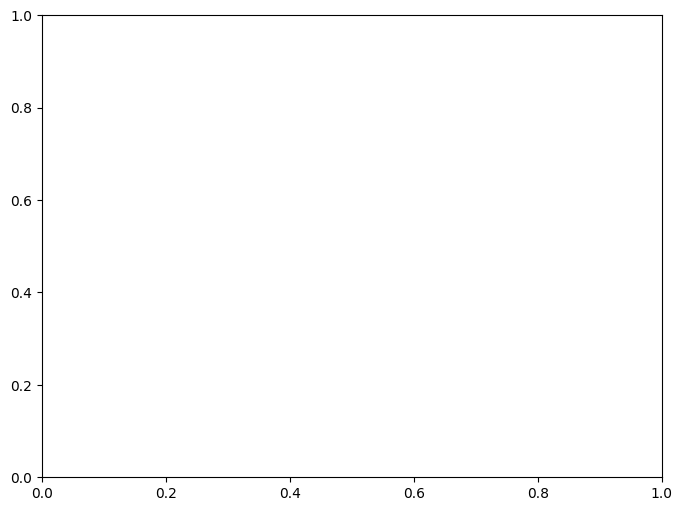

In [15]:
for column in columns:
    plt.figure(figsize=(8, 6))
    # Create a 2D histogram or KDE heatmap
    sns.kdeplot(
        data=data,
        x=column,
        y='Class',
        fill=True,
        cmap='viridis',
        thresh=0,
        levels=100
    )

    plt.title(f'Density Heatmap of {column}')
    plt.xlabel(column)
    plt.ylabel('Class')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


##### Correlation:

Correlation is a statistical measure that quantifies the strength and direction of the linear relationship between two or more variables. It is used to understand how changes in one variable are related to changes in another variable. Correlation does not imply causation; it only indicates the degree to which two variables are associated or move together.

There are different types of correlation coefficients, but the most common one is the Pearson correlation coefficient (also known as Pearson's r). It is used when both variables are continuous and follow a roughly linear relationship. The Pearson correlation coefficient ranges from -1 to +1:

- A correlation coefficient of +1 indicates a perfect positive correlation, meaning the variables increase together in a linear fashion.
- A correlation coefficient of -1 indicates a perfect negative correlation, meaning one variable increases while the other decreases in a linear fashion.
- A correlation coefficient close to 0 suggests little to no linear relationship between the variables. 
                                                                                                                       
There are other correlation coefficients suitable for different types of data, such as the Spearman rank correlation coefficient, which is used for ordinal data, and the point-biserial correlation coefficient, which is used for the correlation between a binary variable and a continuous variable.

Correlation analysis is widely used in various fields, including statistics, social sciences, finance, and data analysis. It helps identify patterns, dependencies, and potential associations between variables, aiding in understanding and interpreting the relationships in data. However, it is essential to interpret correlation carefully and be cautious about assuming causality based solely on correlation results.                                                                                                                    

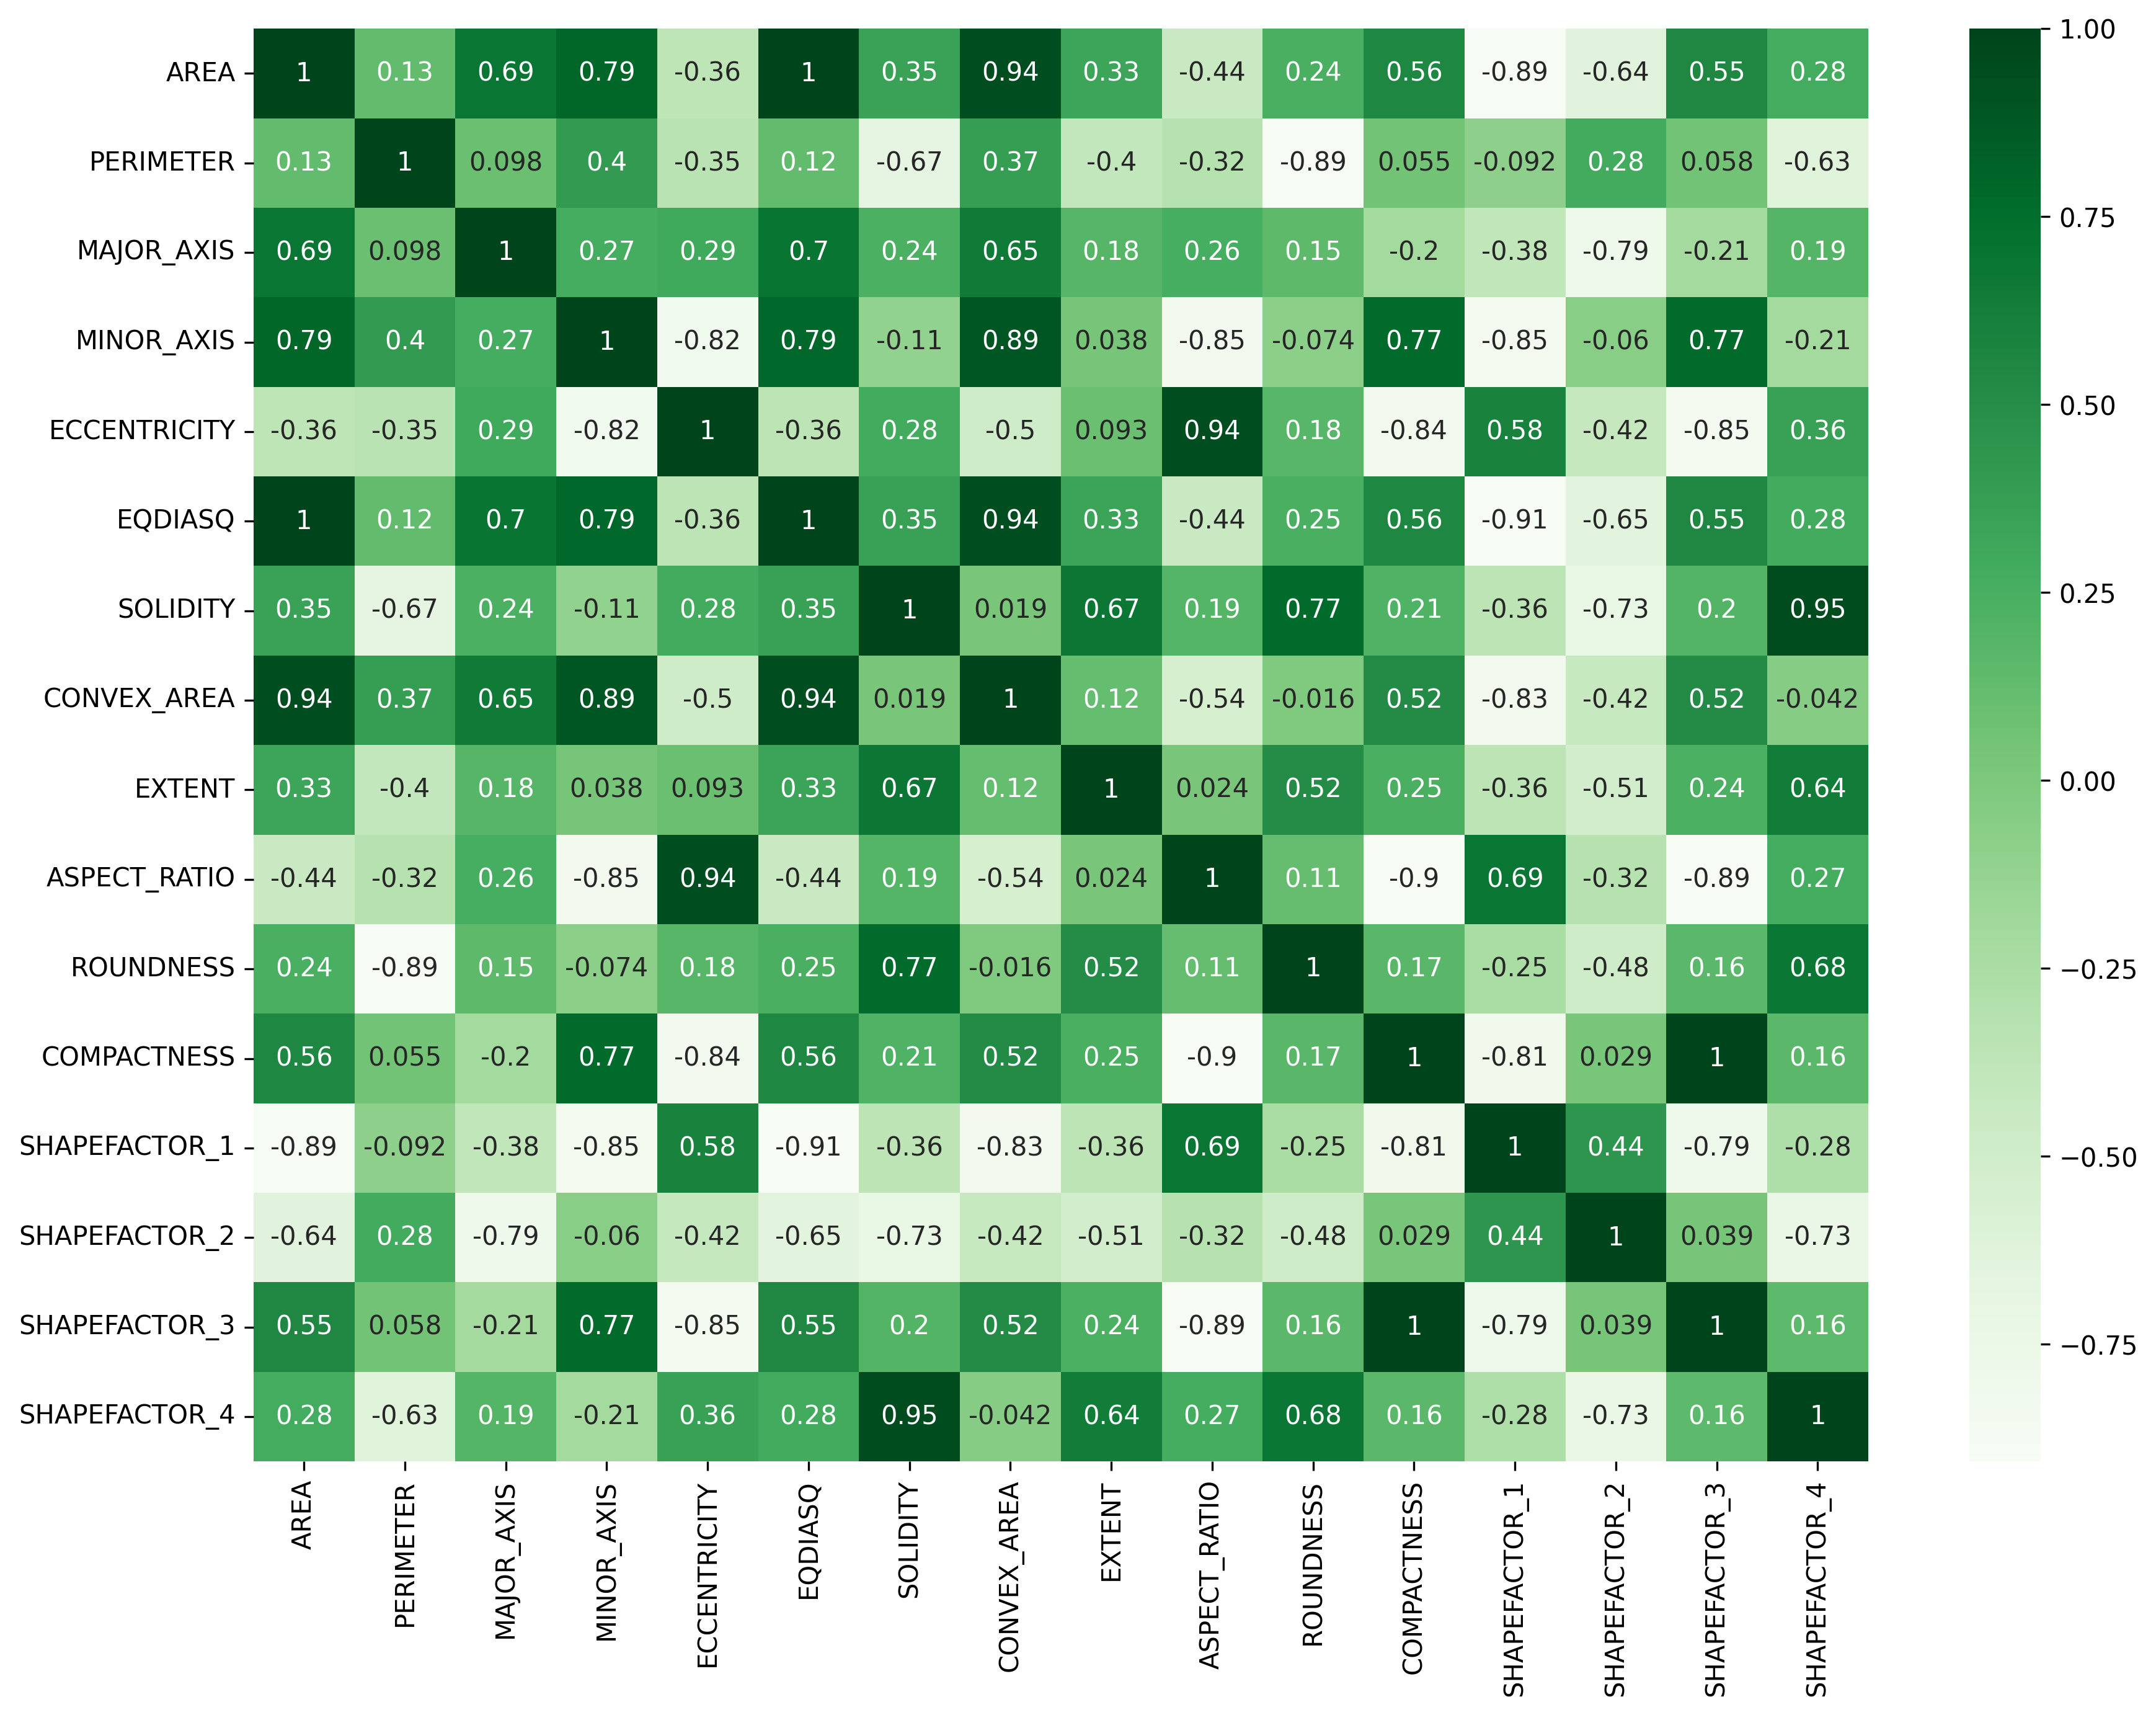

In [18]:
df_corr = data.drop("Class",axis=1).corr()
plt.figure(figsize = (14, 10), dpi = 300)
sns.heatmap(df_corr,annot = True, cmap='Greens')
plt.show()

## Feature Engineering

Feature engineering is the process of transforming raw data into meaningful features that can be used as inputs for machine learning models. It is a critical step in the data preprocessing pipeline and plays a significant role in improving model performance and obtaining more accurate predictions. Feature engineering involves selecting, creating, or modifying features to enhance the representation of the data and make it more suitable for the specific machine learning task at hand.

**Feature Encoding:**

Feature encoding, also known as feature representation or feature transformation, is the process of converting categorical or textual data into numerical representations that can be used as input for machine learning algorithms. Many machine learning models require numerical data as input, and encoding categorical features is necessary to make the data compatible with these models.

There are several methods for feature encoding, and the choice of method depends on the nature of the categorical data and the specific machine learning algorithm being used:

`One-Hot Encoding:` One-hot encoding is a popular method to represent categorical variables with two or more categories. Each category is transformed into a binary vector, where each binary feature corresponds to one category. Only one feature is "hot" (1) for each category, and the others are "cold" (0).

`Label Encoding:` Label encoding assigns a unique integer or numerical label to each category in the categorical variable. The categories are mapped to integers from 0 to (number of categories - 1).

`Ordinal Encoding:` Ordinal encoding is similar to label encoding but explicitly defines an order for the categories. It assigns integer labels based on the predefined order of the categories.

`Frequency Encoding:` Frequency encoding replaces each category with its frequency or count in the dataset. This method can be useful when the frequency of a category provides relevant information about its importance

`Target Encoding (Mean Encoding):` Target encoding uses the target variable's mean or other statistics to encode each category. It is commonly used in classification tasks, where the target variable is binary or categorical.

`Embedding:` For textual or high-dimensional categorical data, embedding techniques like Word2Vec or GloVe can be used to learn dense numerical representations of the categories.

It's important to note that feature encoding must be applied consistently during both the training and testing phases of a machine learning model. Different encoding methods can have a significant impact on model performance, and choosing the appropriate encoding technique is an essential part of the feature engineering process.
    
    

In [19]:
encoder = LabelEncoder()
data['Class'] = encoder.fit_transform(data['Class'])

labels = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
print(labels)

{0: 'Kirmizi_Pistachio', 1: 'Siit_Pistachio'}


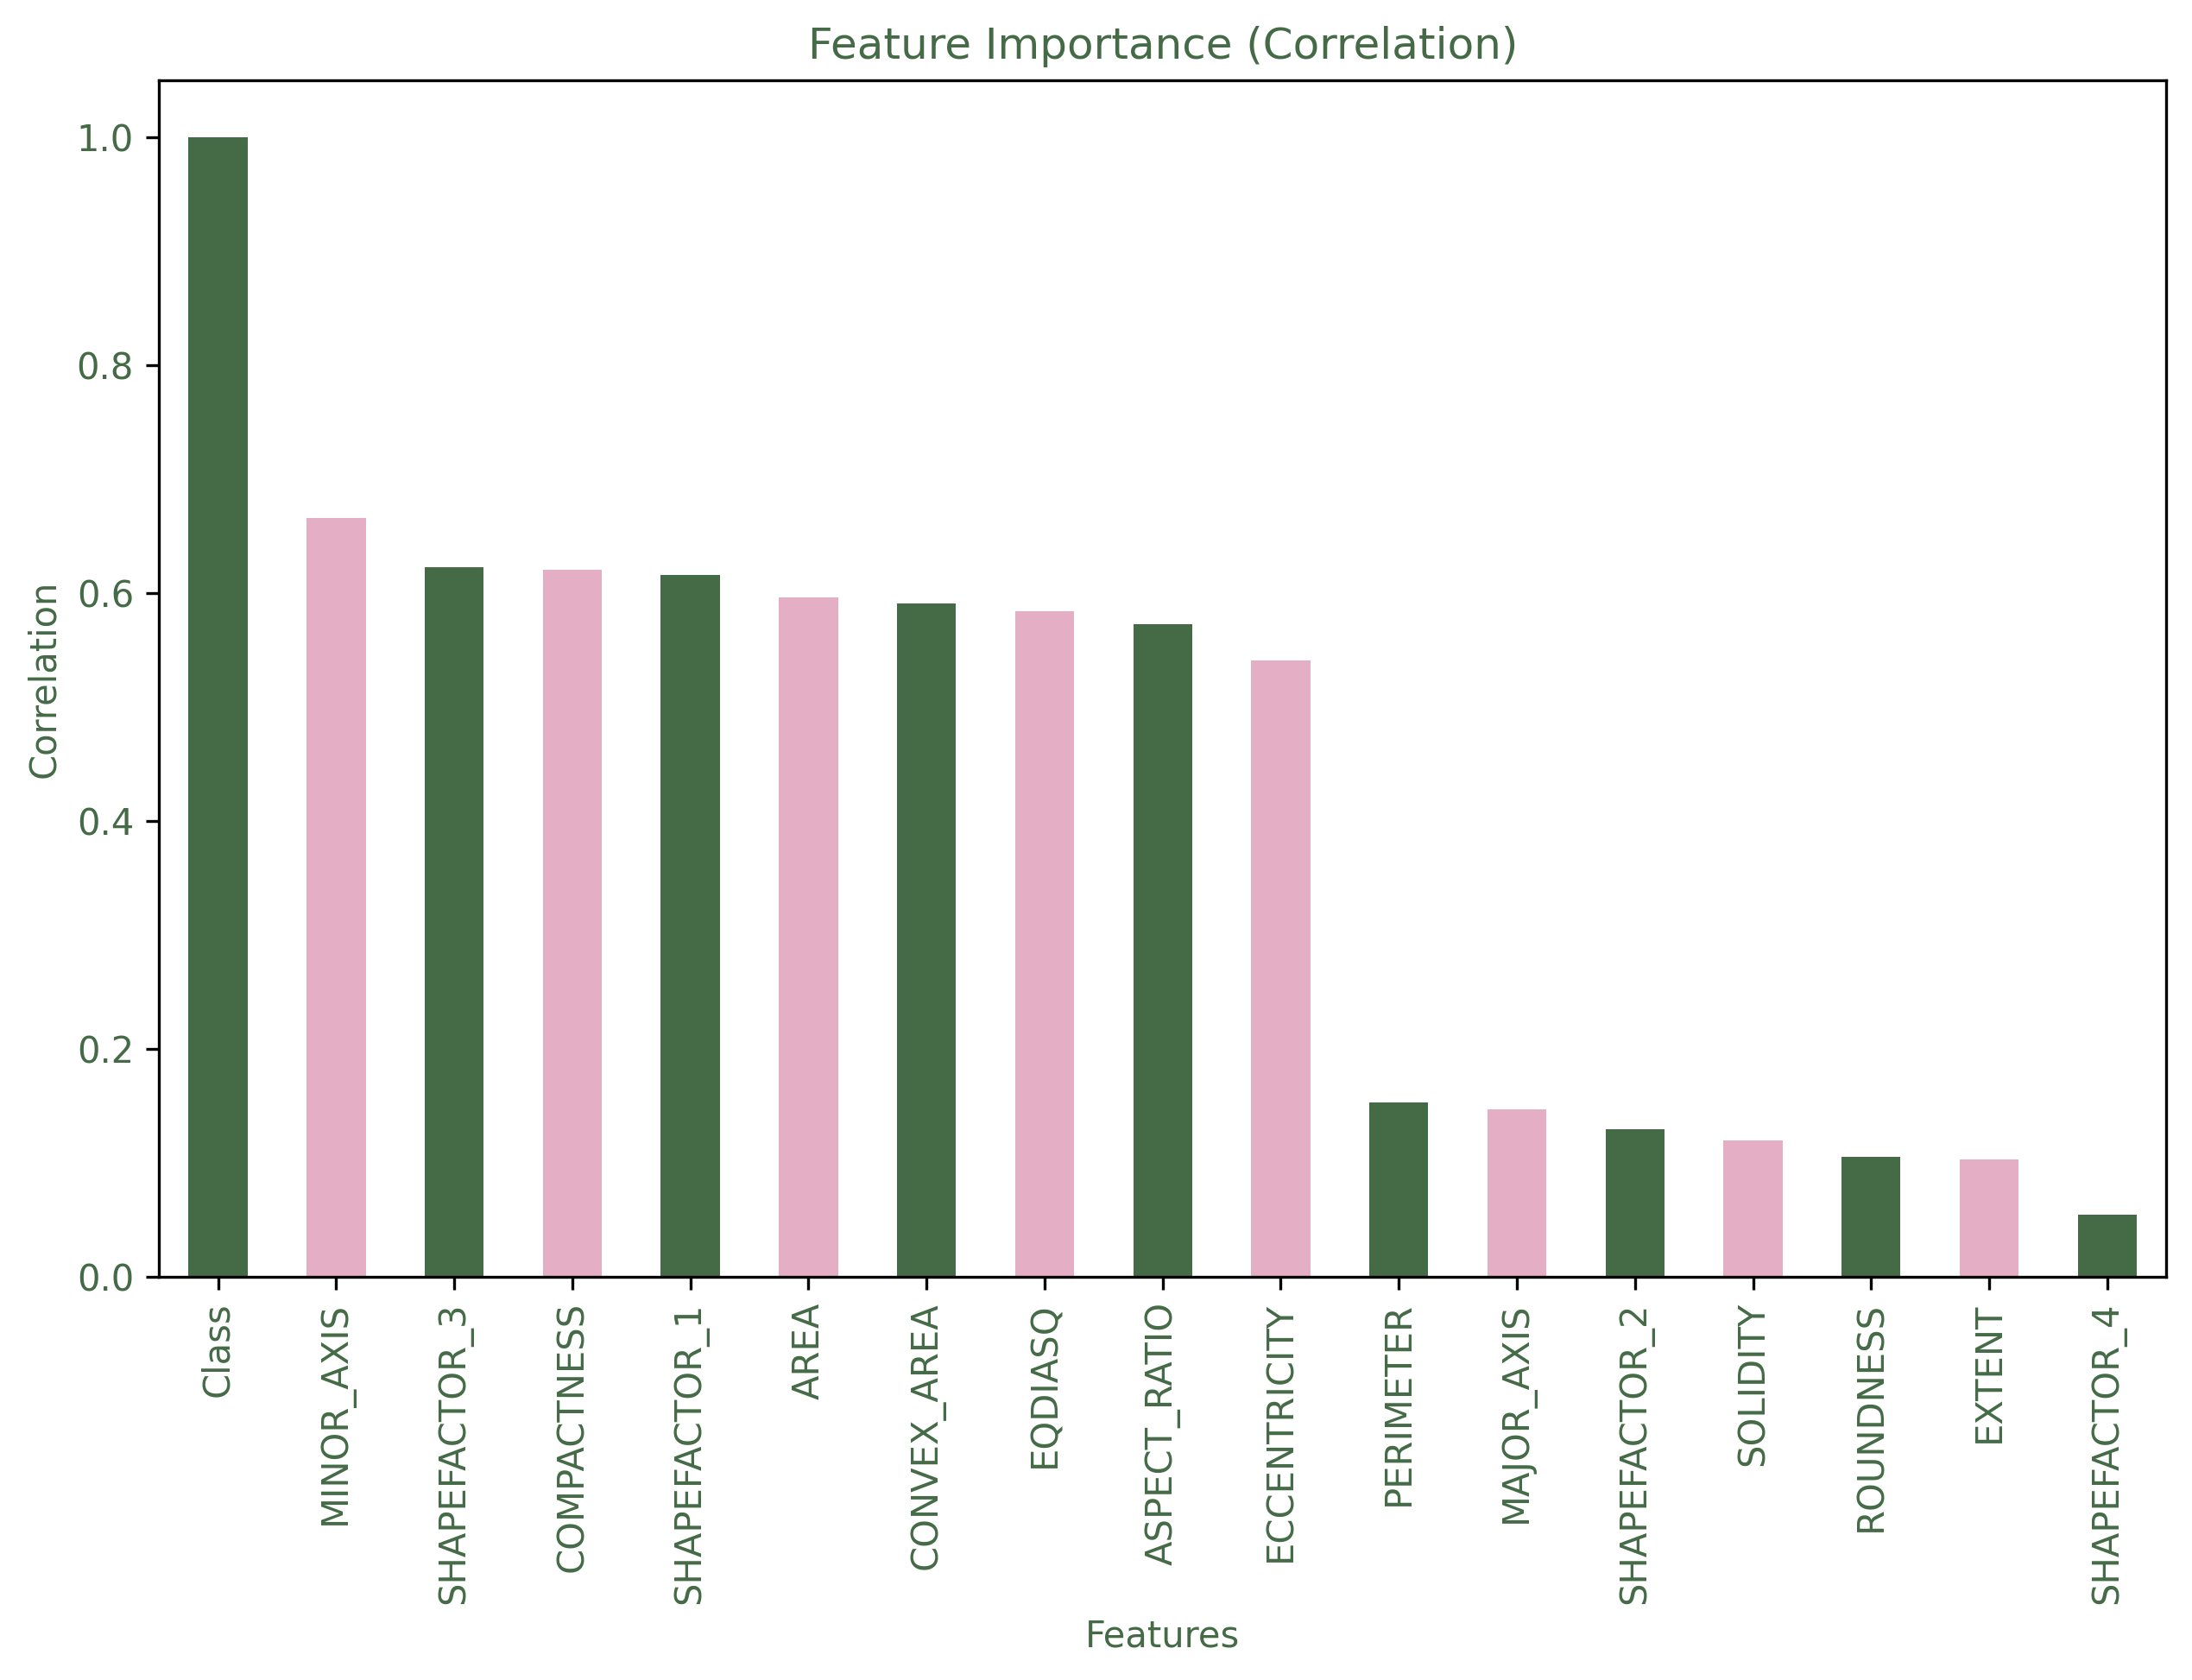

In [20]:
correlation = data.corr()['Class'].abs()
correlation_sorted = correlation.sort_values(ascending=False)

plt.figure(figsize=(10, 6), dpi=300)

bar_colors = ['#446A46', '#E4AEC5']

correlation_sorted.plot(kind='bar', color=bar_colors)
plt.title('Feature Importance (Correlation)', color='#446A46')
plt.xlabel('Features', color='#446A46')
plt.ylabel('Correlation', color='#446A46')
plt.xticks(color='#446A46')
plt.yticks(color='#446A46')
plt.show()

In [21]:
corr_matrix = data.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
THRESHOLD = 0.90
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > THRESHOLD)]
print('Feature(s) to drop:', ', '.join(to_drop))

selected = data.drop(to_drop, axis=1)

print('Number of features before selection:', data.shape[1])
print('Number of features after selection:', selected.shape[1])

Feature(s) to drop: EQDIASQ, CONVEX_AREA, ASPECT_RATIO, SHAPEFACTOR_1, SHAPEFACTOR_3, SHAPEFACTOR_4
Number of features before selection: 17
Number of features after selection: 11


In [22]:
X = data.drop(columns=['EQDIASQ', 'CONVEX_AREA', 'ASPECT_RATIO', 'SHAPEFACTOR_1', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],axis=1)
y = data['Class']

#### Train Test Split:

Train-test split is a fundamental concept in machine learning used to evaluate the performance of a model and avoid overfitting. It involves dividing the available dataset into two distinct sets: the training set and the test set. The model is trained on the training set and then evaluated on the test set to assess its generalization ability.

Here's how the train-test split process works:

`Dataset:` The initial dataset, which contains both input features and corresponding target labels, is obtained. The dataset is typically divided into a feature matrix (X) containing input features and a target vector (y) containing corresponding target labels.

`Random Shuffling:` Before splitting the dataset, it is common practice to randomly shuffle the data to ensure that the data points are not arranged in any particular order that could bias the model training.

`Splitting:` The dataset is split into two sets: the training set and the test set. The training set is used to train the machine learning model, and the test set is used to evaluate its performance. The typical split ratio is 70-80% for the training set and 20-30% for the test set. However, the exact ratio may vary based on the size of the dataset and the specific problem at hand.

`Model Training:` The machine learning model is trained on the training set using the input features (X_train) and the corresponding target labels (y_train).

`Model Evaluation:` After the model is trained, it is evaluated on the test set using the input features (X_test), but the corresponding target labels (y_test) are not used during evaluation. Instead, the model's predictions on the test set (y_pred) are compared to the true target labels (y_test) to assess its performance.

`Performance Metrics:` Various performance metrics, such as accuracy, precision, recall, F1-score, and others, are used to quantify how well the model performs on the test set.

The train-test split is essential to gauge how well the trained model generalizes to unseen data. If the model performs well on the training set but poorly on the test set, it is an indication of overfitting, which means the model has learned the training data too well and fails to generalize to new data. In such cases, additional techniques like cross-validation or regularization may be employed to address overfitting.

It's important to note that train-test split is just one step in the machine learning workflow. In some cases, additional sets like validation sets might be used during hyperparameter tuning or model selection to further fine-tune the model's performance. The ultimate goal is to build a model that performs well on unseen data, making it more useful for real-world applications.



In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
row, col = X_train.shape
print("X_train have",row,"rows and",col,"columns.")
row, col = X_test.shape
print("X_test have",row,"rows and",col,"columns.")

X_train have 1374 rows and 10 columns.
X_test have 344 rows and 10 columns.


#### Standard Scaler:

StandardScaler is a preprocessing technique used in machine learning to standardize or scale the features of a dataset. It transforms the features such that they have a mean of zero and a standard deviation of one. StandardScaler is commonly applied before feeding the data into machine learning algorithms, particularly those that are sensitive to the scale of features.

The formula used to standardize each feature (column) is as follows:

$$Standardized Feature
=
{{Original Feature
−Mean of Feature} \over
{Standard Deviation of Feature}}$$
 

The process involves the following steps:

`Calculate Mean and Standard Deviation:` For each feature, the mean and standard deviation are computed from the training data. The mean represents the center of the distribution, while the standard deviation measures the spread of the data points around the mean.

`Subtract Mean and Divide by Standard Deviation:` For each feature, the mean value is subtracted from each data point, and the result is divided by the standard deviation. This step ensures that the transformed feature has a mean of zero and a standard deviation of one.

**StandardScaler is beneficial for several reasons:**`

`Avoiding Biased Models:` Some machine learning algorithms, such as gradient descent-based optimization methods, can converge faster when features are standardized. Standardization helps prevent any particular feature from dominating the learning process.

`Improving Convergence:` Scaling can improve the convergence behavior of algorithms that use distance-based measurements (e.g., k-means clustering, k-nearest neighbors).

`Equal Treatment of Features:` StandardScaler ensures that all features are treated equally during the learning process, irrespective of their original scales.

`Regularization:` Many regularization techniques, like L1 and L2 regularization, are sensitive to feature scales. Standardization helps in applying regularization uniformly across all features.

However, it's important to note that not all machine learning algorithms require feature scaling. For example, decision tree-based algorithms are generally invariant to feature scales, and therefore, standardization might not be necessary.

StandardScaler is available in various machine learning libraries, such as scikit-learn in Python, and it is commonly used as a preprocessing step when working with numerical data in machine learning tasks.






In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Modeling

**K-Nearest Neighbors (KNN):**
    
KNN is a non-parametric algorithm that classifies new data points based on the majority class among their nearest neighbors in the feature space. The class label is determined based on the K nearest training samples.

**GridSearchCV:**
    
GridSearchCV is a technique used for hyperparameter tuning in machine learning models. It is available in the scikit-learn library in Python and is widely used to find the best set of hyperparameters for a model that maximizes its performance.

In machine learning algorithms, hyperparameters are parameters that are set before the training process and are not learned from the data. They control various aspects of the model's behavior and complexity, such as the learning rate, number of hidden units in a neural network, regularization strength, etc.

GridSearchCV works by exhaustively searching through a specified hyperparameter grid and evaluating the model's performance using cross-validation. It performs the following steps:

`Define the Model:` You need to define the machine learning model you want to tune and create an instance of it.

`Define the Hyperparameter Grid:` For each hyperparameter you want to tune, you define a set of values that you want to try. GridSearchCV will create all possible combinations of these values to form a grid.

`Cross-Validation:` GridSearchCV performs k-fold cross-validation, where the dataset is divided into k subsets (folds). It trains the model on k-1 folds and evaluates it on the remaining fold. This process is repeated k times, and the performance metrics are averaged over the k iterations to obtain an overall evaluation.

`Hyperparameter Search:` GridSearchCV then performs an exhaustive search over the hyperparameter grid, training and evaluating the model for each combination of hyperparameters.

`Best Model Selection:` After evaluating all possible combinations, GridSearchCV identifies the set of hyperparameters that achieved the best performance based on the chosen evaluation metric.

`Refit the Model:` Finally, GridSearchCV retrains the model using the best hyperparameters on the entire training dataset (not just the cross-validation subsets).

GridSearchCV is a powerful tool for finding the best hyperparameters, but it can be computationally expensive, especially when dealing with large datasets or complex models. As the hyperparameter grid expands, the search space grows exponentially, making the search time-consuming. To mitigate this, one can use randomized search (RandomizedSearchCV), which randomly samples hyperparameter combinations from the grid instead of performing an exhaustive search.

By using GridSearchCV, you can efficiently tune the hyperparameters of your model, leading to better generalization and improved performance on unseen data. It allows you to fine-tune your machine learning models and get the most out of them for your specific task

In [26]:
hyperparameters = [{
    'n_neighbors': range(3,21,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}]

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, hyperparameters, scoring='f1', cv=5, verbose=True, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_knn_params = grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [27]:
print(best_knn_params)

{'n_neighbors': 13, 'p': 2, 'weights': 'distance'}


In [28]:
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_train_scaled, y_train.ravel())
y_pred_knn = best_knn.predict(X_test_scaled)

**F1_Score:**
    
The F1 score is a popular performance metric used in binary classification tasks to evaluate the model's accuracy in balancing precision and recall. It is the harmonic mean of precision and recall and provides a single score that balances both measures.
The F1 score ranges from 0 to 1, with 1 being the best possible score, indicating perfect precision and recall. A high F1 score indicates that the model has both high precision and high recall, which means it performs well in correctly identifying positive instances while minimizing false positives and false negatives.

The F1 score is especially useful when the dataset is imbalanced, i.e., when one class has a significantly larger number of instances than the other. In such cases, accuracy alone might not be a reliable performance metric since a model can achieve high accuracy by merely predicting the majority class. The F1 score considers both precision and recall, making it more informative in imbalanced datasets.

In summary, the F1 score is a valuable metric for binary classification tasks, providing a balanced evaluation of the model's performance by considering both precision and recall simultaneously.


In [32]:
print('F1 Score on test data : ', f1_score(y_test, best_knn.predict(X_test_scaled), average='weighted'))
print("*"*50)
print(classification_report(y_test,y_pred_knn))

F1 Score on test data :  0.874935788603021
**************************************************
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       201
           1       0.85      0.85      0.85       143

    accuracy                           0.88       344
   macro avg       0.87      0.87      0.87       344
weighted avg       0.87      0.88      0.87       344



**Confusion Matrix**

A confusion matrix is a table that is used to evaluate the performance of a classification model in machine learning. It provides a comprehensive summary of the model's predictions and the actual outcomes based on the true positive (TP), true negative (TN), false positive (FP), and false negative (FN) values.

In a binary classification problem, the confusion matrix is a 2x2 matrix with four entries:

`True Positive (TP):` The number of instances that are correctly classified as positive (correctly predicted as the positive class).

`True Negative (TN):` The number of instances that are correctly classified as negative (correctly predicted as the negative class).

`False Positive (FP):` The number of instances that are incorrectly classified as positive (predicted as positive but actually negative).

`False Negative (FN):` The number of instances that are incorrectly classified as negative (predicted as negative but actually positive).

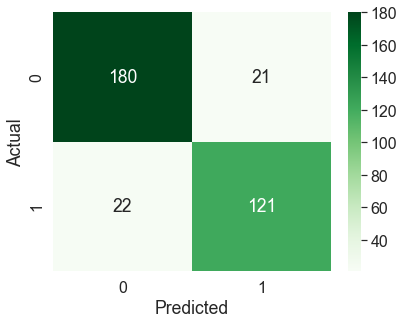

In [33]:
knn_cm = confusion_matrix(y_test, best_knn.predict(X_test_scaled))
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(knn_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Decision Tree**

Decision Tree is a simple and interpretable classification algorithm that uses a tree-like model of decisions and their possible consequences. It splits the data based on features to create a hierarchical structure of if-else conditions to make predictions.


In [34]:
hyperparameters = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]
}]

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, hyperparameters, scoring='f1', cv=5, verbose=True, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_dt_params = grid_search.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [35]:
print(best_dt_params)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [36]:
best_dt = DecisionTreeClassifier(**best_dt_params)
best_dt.fit(X_train, y_train.ravel())
y_pred_dt = best_dt.predict(X_test)

In [37]:
f1 = f1_score(y_test, y_pred_dt)
print("F1 Score on Test Set:", f1)

F1 Score on Test Set: 0.8079470198675497


In [38]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_dt))
y_pred_dt_train = best_dt.predict(X_train)
print("Accuracy on train:", metrics.accuracy_score(y_train,y_pred_dt_train))

Accuracy: 0.8313953488372093
Accuracy on train: 0.8726346433770015


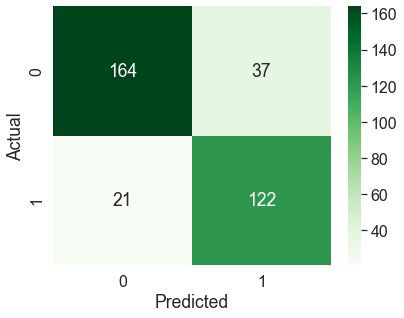

In [39]:
dt_cm = confusion_matrix(y_test, y_pred_dt)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(dt_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Random Forest**

Random Forest is an ensemble learning method that constructs multiple decision trees and combines their predictions to make a final prediction. It reduces overfitting and improves the accuracy and robustness of the model.

In [40]:
hyperparameters = [{
    'n_estimators': range(10,120,10),
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'max_features':[2,3,4]
}]

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, hyperparameters, scoring='f1', cv=5, verbose=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 5, 10], 'max_features': [2, 3, 4],
                          'n_estimators': range(10, 120, 10)}],
             scoring='f1', verbose=True)

In [41]:
best_rf_params = grid_search.best_params_
print(best_rf_params)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'n_estimators': 20}


In [42]:
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(X_train, y_train.ravel())
y_pred_rf = best_rf.predict(X_test)

In [43]:
f1 = f1_score(y_test, y_pred_rf)
print("F1 Score on Test Set:", f1)

F1 Score on Test Set: 0.8453608247422679


In [44]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_rf))
y_pred_rf_train = best_rf.predict(X_train)
print("Accuracy on train:", metrics.accuracy_score(y_train,y_pred_rf_train))

Accuracy: 0.8691860465116279
Accuracy on train: 0.9774381368267832


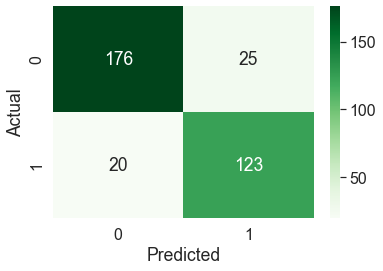

In [45]:
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(rf_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**ADABoost**

Adaptive Boosting (ADABoost) is an ensemble learning method that combines multiple weak classifiers to create a strong classifier. It assigns higher weights to misclassified samples and trains subsequent classifiers to focus on the difficult samples.

In [46]:
ada_params = [{
    'n_estimators': range(300, 400, 10),
    'learning_rate': [0.1, 0.5, 1.0]
}]

ada = AdaBoostClassifier()
ada_grid_search = GridSearchCV(ada, ada_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
ada_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.5, 1.0],
                          'n_estimators': range(300, 400, 10)}],
             scoring='f1', verbose=True)

In [47]:
best_ada_params = ada_grid_search.best_params_
print(best_ada_params)

{'learning_rate': 0.1, 'n_estimators': 320}


In [48]:
best_ada = AdaBoostClassifier(**best_ada_params)
best_ada.fit(X_train, y_train)
y_pred_ada = best_ada.predict(X_test)

In [49]:
f1_ada = f1_score(y_test, y_pred_ada)
print("F1 Score on Test Set (ADABoost):", f1_ada)

F1 Score on Test Set (ADABoost): 0.8424657534246576


In [50]:
print("Accuracy (ADABoost):", metrics.accuracy_score(y_test, y_pred_ada))
y_pred_ada_train = best_ada.predict(X_train)
print("Accuracy on train (ADABoost):", metrics.accuracy_score(y_train, y_pred_ada_train))

Accuracy (ADABoost): 0.8662790697674418
Accuracy on train (ADABoost): 0.8828238719068413


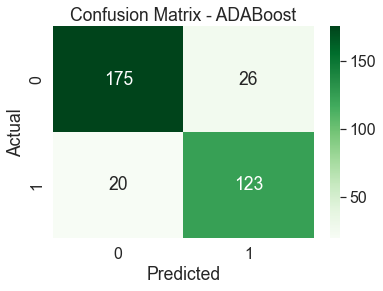

In [51]:
ada_cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(dpi=70)
sns.heatmap(ada_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ADABoost')
plt.show()

**XGBoost**

XGBoost is an optimized gradient boosting framework that is highly efficient and widely used in machine learning competitions. It combines multiple weak prediction models (usually decision trees) and iteratively improves the model's performance by minimizing a loss function.

In [52]:
xgb_params = [{
    'n_estimators': range(10, 50, 10),
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': range(3,21,2)
}]

xgb = XGBClassifier()
xgb_grid_search = GridSearchCV(xgb, xgb_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.5, 1.0],
                          'max_depth': range(3, 21, 2),
                          'n_estimators': range(10, 50, 10)}],
             scoring='f1', verbose=True)

In [53]:
best_xgb_params = xgb_grid_search.best_params_
print(best_xgb_params)

{'learning_rate': 0.5, 'max_depth': 15, 'n_estimators': 30}


In [54]:
best_xgb = XGBClassifier(**best_xgb_params)
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_test)

In [55]:
f1_xgb = f1_score(y_test, y_pred_xgb)
print("F1 Score on Test Set (XGBoost):", f1_xgb)

F1 Score on Test Set (XGBoost): 0.85121107266436


In [56]:
print("Accuracy (XGBoost):", metrics.accuracy_score(y_test, y_pred_xgb))
y_pred_xgb_train = best_xgb.predict(X_train)
print("Accuracy on train (XGBoost):", metrics.accuracy_score(y_train, y_pred_xgb_train))

Accuracy (XGBoost): 0.875
Accuracy on train (XGBoost): 1.0


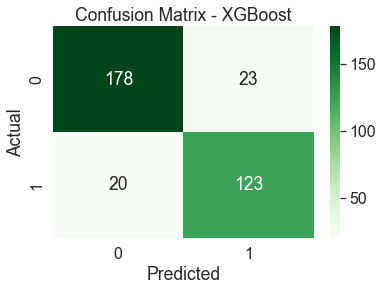

In [57]:
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(dpi=70)
sns.heatmap(xgb_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

**Logistic Regression**

Logistic Regression is a linear classification algorithm used for binary classification tasks. It models the probability of an instance belonging to a certain class using a logistic function and makes predictions based on a predefined threshold.

In [58]:
lr_params = [{'C': [0.1, 1, 10]}]

lr = LogisticRegression()
lr_grid_search = GridSearchCV(lr, lr_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10]}], scoring='f1', verbose=True)

In [59]:
best_lr_params = lr_grid_search.best_params_
print(best_lr_params)

{'C': 0.1}


In [60]:
best_lr = LogisticRegression(**best_lr_params)
best_lr.fit(X_train, y_train)
y_pred_lr = best_lr.predict(X_test)

In [61]:
f1_lr = f1_score(y_test, y_pred_lr)
print("F1 Score on Test Set (Logistic Regression):", f1_lr)

F1 Score on Test Set (Logistic Regression): 0.8794326241134752


In [62]:
print("Accuracy (Logistic Regression):", metrics.accuracy_score(y_test, y_pred_lr))
y_pred_lr_train = best_lr.predict(X_train)
print("Accuracy on train (Logistic Regression):", metrics.accuracy_score(y_train, y_pred_lr_train))

Accuracy (Logistic Regression): 0.9011627906976745
Accuracy on train (Logistic Regression): 0.8609898107714702


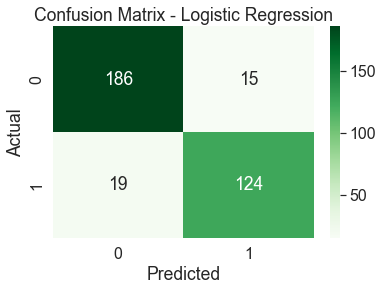

In [63]:
lr_cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(dpi=70)
sns.heatmap(lr_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**Gaussain Naive Bayes**

Naive Bayes is a probabilistic classifier based on Bayes' theorem. It assumes independence among features and calculates the posterior probability of an instance belonging to a particular class based on the prior probability and likelihood.

In [64]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

f1_nb = f1_score(y_test, y_pred_nb)
print("F1 Score on Test Set (Naive Bayes):", f1_nb)

F1 Score on Test Set (Naive Bayes): 0.7713310580204777


In [65]:
print("Accuracy (Naive Bayes):", metrics.accuracy_score(y_test, y_pred_nb))
y_pred_nb_train = nb.predict(X_train)
print("Accuracy on train (Naive Bayes):", metrics.accuracy_score(y_train, y_pred_nb_train))

Accuracy (Naive Bayes): 0.8052325581395349
Accuracy on train (Naive Bayes): 0.8296943231441049


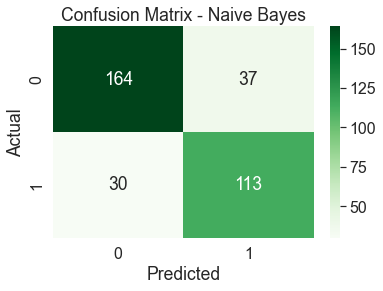

In [66]:
nb_cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(dpi=70)
sns.heatmap(nb_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

**Support Vector Machines (SVM)**

SVM is a powerful classification algorithm that finds a hyperplane that maximally separates the classes in the feature space. It aims to find the best decision boundary by maximizing the margin between classes.

In [67]:
svm_params = [{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC()
svm_grid_search = GridSearchCV(svm, svm_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
svm_grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}],
             scoring='f1', verbose=True)

In [68]:
best_svm_params = svm_grid_search.best_params_
print(best_svm_params)

{'C': 10, 'kernel': 'rbf'}


In [69]:
best_svm = SVC(**best_svm_params)
best_svm.fit(X_train_scaled, y_train)
y_pred_svm = best_svm.predict(X_test_scaled)

In [70]:
f1_svm = f1_score(y_test, y_pred_svm)
print("F1 Score on Test Set (SVM):", f1_svm)

F1 Score on Test Set (SVM): 0.8611111111111112


In [71]:
print("Accuracy (SVM):", metrics.accuracy_score(y_test, y_pred_svm))
y_pred_svm_train = best_svm.predict(X_train_scaled)
print("Accuracy on train (SVM):", metrics.accuracy_score(y_train, y_pred_svm_train))

Accuracy (SVM): 0.8837209302325582
Accuracy on train (SVM): 0.901018922852984


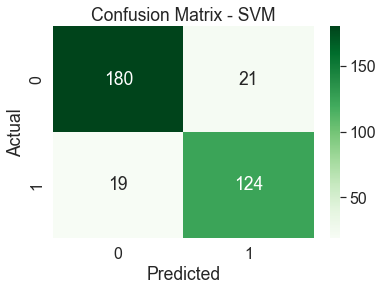

In [72]:
svm_cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(dpi=70)
sns.heatmap(svm_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

**Gradient Boosting**

Gradient Boosting is an ensemble learning method that trains multiple models successively, with each succeeding model correcting the flaws of the prior ones. To reduce the loss function, it employs gradient descent optimization.

In [73]:
gbm_params = [{
    'n_estimators': range(100, 150, 10),
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [2, 3, 4, 5]
}]

gbm = GradientBoostingClassifier()
gbm_grid_search = GridSearchCV(gbm, gbm_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
gbm_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.5, 1.0],
                          'max_depth': [2, 3, 4, 5],
                          'n_estimators': range(100, 150, 10)}],
             scoring='f1', verbose=True)

In [74]:
best_gbm_params = gbm_grid_search.best_params_
print(best_gbm_params)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 110}


In [75]:
best_gbm = GradientBoostingClassifier(**best_gbm_params)
best_gbm.fit(X_train, y_train)
y_pred_gbm = best_gbm.predict(X_test)

In [76]:
f1_gbm = f1_score(y_test, y_pred_gbm)
print("F1 Score on Test Set (GBM):", f1_gbm)

F1 Score on Test Set (GBM): 0.8501742160278747


In [77]:
print("Accuracy (GBM):", metrics.accuracy_score(y_test, y_pred_gbm))
y_pred_gbm_train = best_gbm.predict(X_train)
print("Accuracy on train (GBM):", metrics.accuracy_score(y_train, y_pred_gbm_train))

Accuracy (GBM): 0.875
Accuracy on train (GBM): 0.9767103347889374


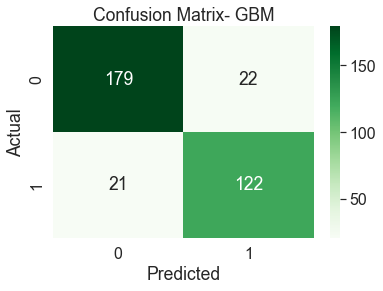

In [78]:
gbm_cm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(dpi=70)
sns.heatmap(gbm_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix- GBM')
plt.show()

**Gradient Boosting Decision Trees (GBDT)**

GBDT is another ensemble learning method that combines multiple decision trees in a boosting framework. It sequentially trains decision trees, where each subsequent tree corrects the mistakes made by the previous ones using gradient descent optimization.

In [80]:
gbdt_params = [{
    'n_estimators': range(100, 200, 10),
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': range(3,11,2)
}]

gbdt = GradientBoostingClassifier()
gbdt_grid_search = GridSearchCV(gbdt, gbdt_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
gbdt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.5, 1.0],
                          'max_depth': range(3, 11, 2),
                          'n_estimators': range(100, 200, 10)}],
             scoring='f1', verbose=True)

In [81]:
best_gbdt_params = gbdt_grid_search.best_params_
print(best_gbdt_params)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 130}


In [82]:
best_gbdt = GradientBoostingClassifier(**best_gbdt_params)
best_gbdt.fit(X_train, y_train)
y_pred_gbdt = best_gbdt.predict(X_test)

In [83]:
f1_gbdt = f1_score(y_test, y_pred_gbdt)
print("F1 Score on Test Set (GBDT):", f1_gbdt)

F1 Score on Test Set (GBDT): 0.8531468531468531


In [84]:
print("Accuracy (GBDT):", metrics.accuracy_score(y_test, y_pred_gbdt))
y_pred_gbdt_train = best_gbdt.predict(X_train)
print("Accuracy on train (GBDT):", metrics.accuracy_score(y_train, y_pred_gbdt_train))

Accuracy (GBDT): 0.877906976744186
Accuracy on train (GBDT): 0.9388646288209607


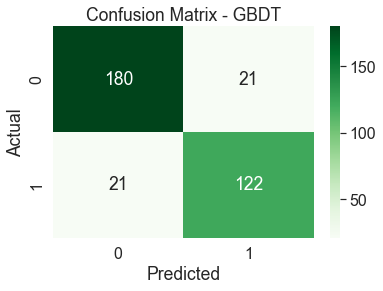

In [85]:
gbdt_cm = confusion_matrix(y_test, y_pred_gbdt)
plt.figure(dpi=70)
sns.heatmap(gbdt_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GBDT')
plt.show()

### Finding the best method for our model

In [86]:
accuracy_scores = {}

accuracy_scores['Random Forest'] = metrics.accuracy_score(y_test, y_pred_rf)
accuracy_scores['Decision Tree'] = metrics.accuracy_score(y_test, y_pred_dt)
accuracy_scores['K-Nearest Neighbors'] = metrics.accuracy_score(y_test, y_pred_knn)
accuracy_scores['ADABoost'] = metrics.accuracy_score(y_test, y_pred_ada)
accuracy_scores['XGBoost'] = metrics.accuracy_score(y_test, y_pred_xgb)
accuracy_scores['Logistic Regression'] = metrics.accuracy_score(y_test, y_pred_lr)
accuracy_scores['Naive Bayes'] = metrics.accuracy_score(y_test, y_pred_nb)
accuracy_scores['SVM'] = metrics.accuracy_score(y_test, y_pred_svm)
accuracy_scores['Gradient Boosting'] = metrics.accuracy_score(y_test, y_pred_gbm)
accuracy_scores['Gradient Boosting Decision Trees'] = metrics.accuracy_score(y_test, y_pred_gbdt)

best_method = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_method]

for method, accuracy in accuracy_scores.items():
    print(f"{method}: {accuracy}")

print(f"\nBest Method: {best_method}")
print(f"Accuracy: {best_accuracy}")

Random Forest: 0.8691860465116279
Decision Tree: 0.8313953488372093
K-Nearest Neighbors: 0.875
ADABoost: 0.8662790697674418
XGBoost: 0.875
Logistic Regression: 0.9011627906976745
Naive Bayes: 0.8052325581395349
SVM: 0.8837209302325582
Gradient Boosting: 0.875
Gradient Boosting Decision Trees: 0.877906976744186

Best Method: Logistic Regression
Accuracy: 0.9011627906976745


In [87]:
f1_scores = {}

f1_scores['Random Forest'] = f1_score(y_test, y_pred_rf)
f1_scores['Decision Tree'] = f1_score(y_test, y_pred_dt)
f1_scores['K-Nearest Neighbors'] = f1_score(y_test, y_pred_knn)
f1_scores['ADABoost'] = f1_score(y_test, y_pred_ada)
f1_scores['XGBoost'] = f1_score(y_test, y_pred_xgb)
f1_scores['Logistic Regression'] = f1_score(y_test, y_pred_lr)
f1_scores['Naive Bayes'] = f1_score(y_test, y_pred_nb)
f1_scores['SVM'] = f1_score(y_test, y_pred_svm)
f1_scores['Gradient Boosting'] = f1_score(y_test, y_pred_gbm)
f1_scores['Gradient Boosting Decision Trees'] = f1_score(y_test, y_pred_gbdt)

best_method = max(f1_scores, key=f1_scores.get)
best_f1_score = f1_scores[best_method]

for method, f1 in f1_scores.items():
    print(f"{method}: {f1}")

print(f"\nBest Method: {best_method}")
print(f"Best F1 Score: {best_f1_score}")

Random Forest: 0.8453608247422679
Decision Tree: 0.8079470198675497
K-Nearest Neighbors: 0.8491228070175438
ADABoost: 0.8424657534246576
XGBoost: 0.85121107266436
Logistic Regression: 0.8794326241134752
Naive Bayes: 0.7713310580204777
SVM: 0.8611111111111112
Gradient Boosting: 0.8501742160278747
Gradient Boosting Decision Trees: 0.8531468531468531

Best Method: Logistic Regression
Best F1 Score: 0.8794326241134752


**Receiver Operating Characteristic (ROC) Curve and Precision-Recall Curve**

The ROC curve is a graphical representation of the true positive rate (sensitivity) against the false positive rate (1 - specificity) at different classification thresholds. It provides a visual assessment of the classifier's performance across different thresholds.
The precision-recall curve is a plot of the precision (positive predictive value) against the recall (sensitivity) at different classification thresholds. It helps evaluate the trade-off between precision and recall for different threshold values.

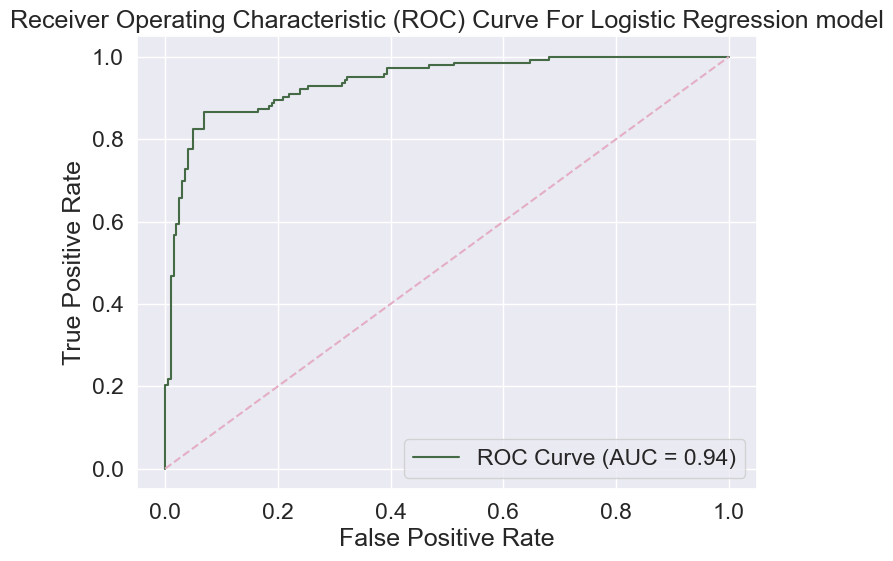

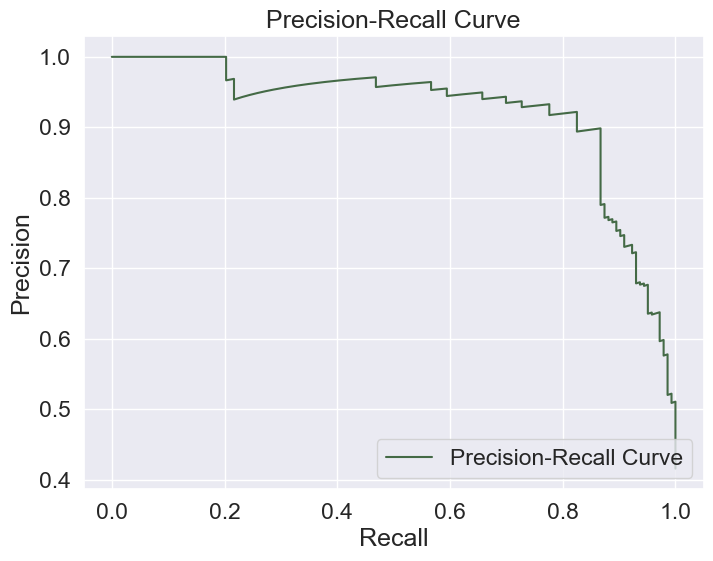

In [88]:
best_algorithm_probs = best_lr.predict_proba(X_test)[:, 1]
fpr, tpr, roc_thresholds = roc_curve(y_test, best_algorithm_probs)
precision, recall, pr_thresholds = precision_recall_curve(y_test, best_algorithm_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fpr, tpr, color='#446A46', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', color='#E4AEC5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For Logistic Regression model')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(recall, precision, color='#446A46', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()


**Calibration Curve**

A calibration curve depicts the relationship between expected and observed positive class probabilities. It aids in determining the calibration or dependability of the classifier's projected probabilities.

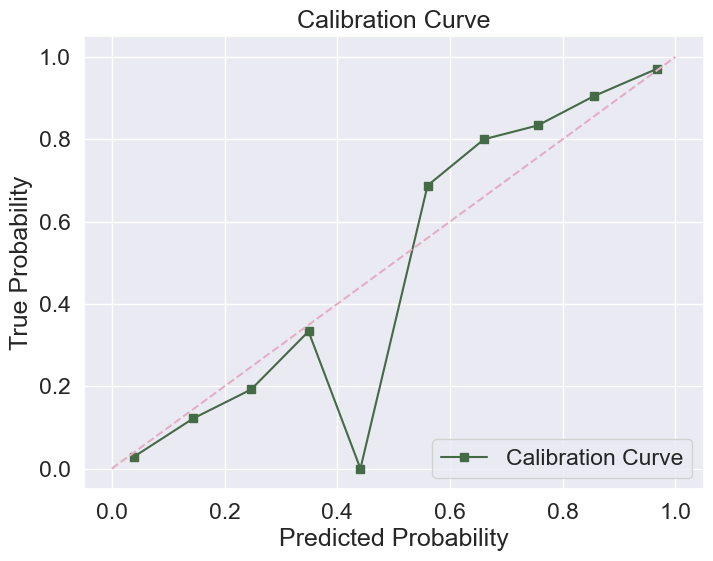

In [89]:
from sklearn.calibration import calibration_curve

true_probs, predicted_probs = calibration_curve(y_test, best_algorithm_probs, n_bins=10)

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(predicted_probs, true_probs, 's-',color='#446A46', label='Calibration Curve')
plt.plot([0, 1], [0, 1], '--', color='#E4AEC5')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend(loc='lower right')
plt.show()

**Precision-Recall Trade-off**

To see the trade-off between the two measures, plot precision and recall as a function of the categorization threshold. This might assist you in selecting an acceptable threshold based on the unique requirements of your challenge.

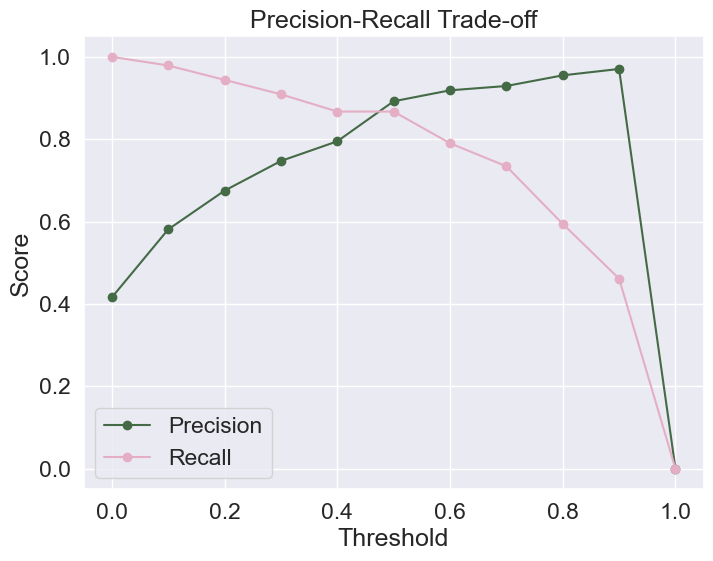

In [90]:
thresholds = np.arange(0, 1.1, 0.1)
precision_values = []
recall_values = []

for threshold in thresholds:
    predicted_labels = best_lr.predict_proba(X_test)[:, 1] > threshold
    precision = metrics.precision_score(y_test, predicted_labels)
    recall = metrics.recall_score(y_test, predicted_labels)
    precision_values.append(precision)
    recall_values.append(recall)

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(thresholds, precision_values, 'o-', color='#446A46', label='Precision')
plt.plot(thresholds, recall_values, 'o-', color='#E4AEC5', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')
plt.legend(loc='lower left')
plt.show()